In [750]:
import pandas as pd
import prophet as pr
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot

In [751]:
import warnings
warnings.filterwarnings('ignore')

In [752]:
%cd -q ../..
from utils import util
from utils import executor
from utils import metrics
%cd -q -

In [753]:
manager=executor.GasModelManager()
slots=manager.get_slots()
df_gesamt=manager.df_gesamt[0:365*2]

In [754]:
fold=0
target='RLM'
#start='2012-05-01'

In [755]:
def format_df(df,target):
    df['ds']=df.index
    df['y']=df[target]
    return df

In [756]:
df_mod=format_df(df_gesamt,target)

In [757]:
def is_winter(ds):
    date = pd.to_datetime(ds)
    return (date.month > 11 or date.month < 2)

df_mod['winter_season'] = df_mod['ds'].apply(is_winter)
df_mod['summer_season'] = ~df_mod['ds'].apply(is_winter)

In [758]:
def init_prophet():

    changepoint_prior_scale = 0.05 # Decreasing it will make the trend less flexible, DEFAULT=0.05
    seasonality_prior_scale=10 #large value allows the seasonality to fit large fluctuations [0.01, 10], DEFAULT=10
    holidays_prior_scale=10 #[0.01, 10] DEFAULT=10
    monthly_prior_scale=10
    seasonality_mode='additive' # DEFAULT='additive'

    yearly_seasonality_s=14 #increased when the seasonality needs to fit higher-frequency changes, DEFAULT=10
    weekly_seasonality=9
    monthly_seasonality=9
    mcmc_samples=0 # uncertainty in seasonality, you must do full Bayesian sampling, DEFAULT=0
    growth='linear' # DEFAULT='linear'

    extra_prior=10
    extra_seasonality=60

    #m=pr.Prophet(yearly_seasonality=True,growth='linear')
    m=pr.Prophet(yearly_seasonality=yearly_seasonality_s,weekly_seasonality=weekly_seasonality,growth=growth, changepoint_prior_scale=changepoint_prior_scale,holidays_prior_scale=holidays_prior_scale,seasonality_prior_scale=seasonality_prior_scale,seasonality_mode=seasonality_mode, mcmc_samples=mcmc_samples)

    m.add_seasonality(name='monthly', period=30.5, fourier_order=monthly_seasonality,mode=seasonality_mode, prior_scale=monthly_prior_scale)

    m.add_regressor('SLP',prior_scale=5,mode='additive')

    for i in ['tavg_mean', 'tavg_std', 'tmin_mean','tmin_std', 'tmax_mean', 'tmax_std', 'prcp_mean', 'prcp_std','snow_mean', 'snow_std', 'wdir_mean', 'wdir_std', 'wspd_mean','wspd_std', 'wpgt_mean', 'wpgt_std', 'pres_mean', 'pres_std','tsun_mean', 'tsun_std']:
        m.add_regressor(i,prior_scale=5,mode='additive')

    #m.add_seasonality(name='winter_season', period=7, fourier_order=extra_seasonality,mode=seasonality_mode, prior_scale=extra_prior, condition_name='winter_season')
    #m.add_seasonality(name='summer_season', period=30.5, fourier_order=extra_seasonality,mode=seasonality_mode, prior_scale=extra_prior, condition_name='summer_season')

    m.add_country_holidays(country_name='DE')
    return m

In [768]:
make_imputation=True

imputed=[]
past=[]

k=2
#k=len(slots)

if make_imputation is True:
    for i in range(k):
        train_df=format_df(manager.get_train(i),target)
        m=init_prophet()
        m.fit(train_df)

        past.append(m.predict())

        future=format_df(manager.get_forecast(i, 0),target)

        imputed.append(m.predict(future[['ds','SLP','tavg_mean', 'tavg_std', 'tmin_mean','tmin_std', 'tmax_mean', 'tmax_std', 'prcp_mean', 'prcp_std','snow_mean', 'snow_std', 'wdir_mean', 'wdir_std', 'wspd_mean','wspd_std', 'wpgt_mean', 'wpgt_std', 'pres_mean', 'pres_std','tsun_mean', 'tsun_std']]))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2012-10-24 00:00:00", 390 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2012-11-23 00:00:00", 420 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2012-12-23 00:00:00", 450 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-01-22 00:00:00", 480 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-02-21 00:00:00", 510 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-03-23 00:00:00", 540 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-04-22 00:00:00", 570 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-05-22 00:00:00", 600 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-06-21 00:00:00", 630 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-07-21 00:00:00", 660 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-08-20 00:00:00", 690 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-09-19 00:00:00", 720 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-10-19 00:00:00", 750 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-11-18 00:00:00", 780 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2013-12-18 00:00:00", 810 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-01-17 00:00:00", 840 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-02-16 00:00:00", 870 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-03-18 00:00:00", 900 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-04-17 00:00:00", 930 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-05-17 00:00:00", 960 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-06-16 00:00:00", 990 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-07-16 00:00:00", 1020 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-08-15 00:00:00", 1050 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-09-14 00:00:00", 1080 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-10-14 00:00:00", 1110 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-11-13 00:00:00", 1140 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2014-12-13 00:00:00", 1170 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-01-12 00:00:00", 1200 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-02-11 00:00:00", 1230 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-03-13 00:00:00", 1260 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-04-12 00:00:00", 1290 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-05-12 00:00:00", 1320 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-06-11 00:00:00", 1350 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-07-11 00:00:00", 1380 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-08-10 00:00:00", 1410 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-09-09 00:00:00", 1440 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-10-09 00:00:00", 1470 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-11-08 00:00:00", 1500 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2015-12-08 00:00:00", 1530 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-01-07 00:00:00", 1560 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-02-06 00:00:00", 1590 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-03-07 00:00:00", 1620 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-04-06 00:00:00", 1650 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-05-06 00:00:00", 1680 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-06-05 00:00:00", 1710 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-07-05 00:00:00", 1740 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-08-04 00:00:00", 1770 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-09-03 00:00:00", 1800 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-10-03 00:00:00", 1830 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-11-02 00:00:00", 1860 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2016-12-02 00:00:00", 1890 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-01-01 00:00:00", 1920 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-01-31 00:00:00", 1950 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-03-02 00:00:00", 1980 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-04-01 00:00:00", 2010 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-05-01 00:00:00", 2040 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-05-31 00:00:00", 2070 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-06-30 00:00:00", 2100 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-07-30 00:00:00", 2130 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-08-29 00:00:00", 2160 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-09-28 00:00:00", 2190 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-10-28 00:00:00", 2220 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-11-27 00:00:00", 2250 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2017-12-27 00:00:00", 2280 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-01-26 00:00:00", 2310 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-02-25 00:00:00", 2340 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-03-27 00:00:00", 2370 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-04-26 00:00:00", 2400 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-05-26 00:00:00", 2430 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-06-25 00:00:00", 2460 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-07-25 00:00:00", 2490 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-08-24 00:00:00", 2520 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-09-23 00:00:00", 2550 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-10-23 00:00:00", 2580 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-11-22 00:00:00", 2610 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2018-12-22 00:00:00", 2640 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-01-21 00:00:00", 2670 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-02-20 00:00:00", 2700 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-03-22 00:00:00", 2730 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-04-21 00:00:00", 2760 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-05-21 00:00:00", 2790 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-06-20 00:00:00", 2820 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-07-20 00:00:00", 2850 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-08-19 00:00:00", 2880 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-09-18 00:00:00", 2910 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-10-18 00:00:00", 2940 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-11-17 00:00:00", 2970 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2019-12-17 00:00:00", 3000 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-01-16 00:00:00", 3030 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-02-15 00:00:00", 3060 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-03-16 00:00:00", 3090 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-04-15 00:00:00", 3120 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-05-15 00:00:00", 3150 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-06-14 00:00:00", 3180 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-07-14 00:00:00", 3210 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-08-13 00:00:00", 3240 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-09-12 00:00:00", 3270 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-10-12 00:00:00", 3300 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-11-11 00:00:00", 3330 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2020-12-11 00:00:00", 3360 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-01-10 00:00:00", 3390 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-02-09 00:00:00", 3420 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-03-11 00:00:00", 3450 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-04-10 00:00:00", 3480 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-05-10 00:00:00", 3510 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-06-09 00:00:00", 3540 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-07-09 00:00:00", 3570 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-08-08 00:00:00", 3600 elements


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Train dates are from "2011-10-01 00:00:00" to "2021-09-07 00:00:00", 3630 elements


In [769]:
rlm_imputed=None
for i in imputed:
    if rlm_imputed is None:
        rlm_imputed=i
    else:
        rlm_imputed=pd.concat([rlm_imputed,i])

In [770]:
rlm_imputed2=None

for i in range(len(past)):
    if rlm_imputed2 is None:
        rlm_imputed2=past[i]
    else:
        tmp=past[i]
        rlm_imputed2=pd.concat([rlm_imputed2,tmp[tmp['ds']>rlm_imputed2.iloc[-1]['ds']]])


0.035849390354579444


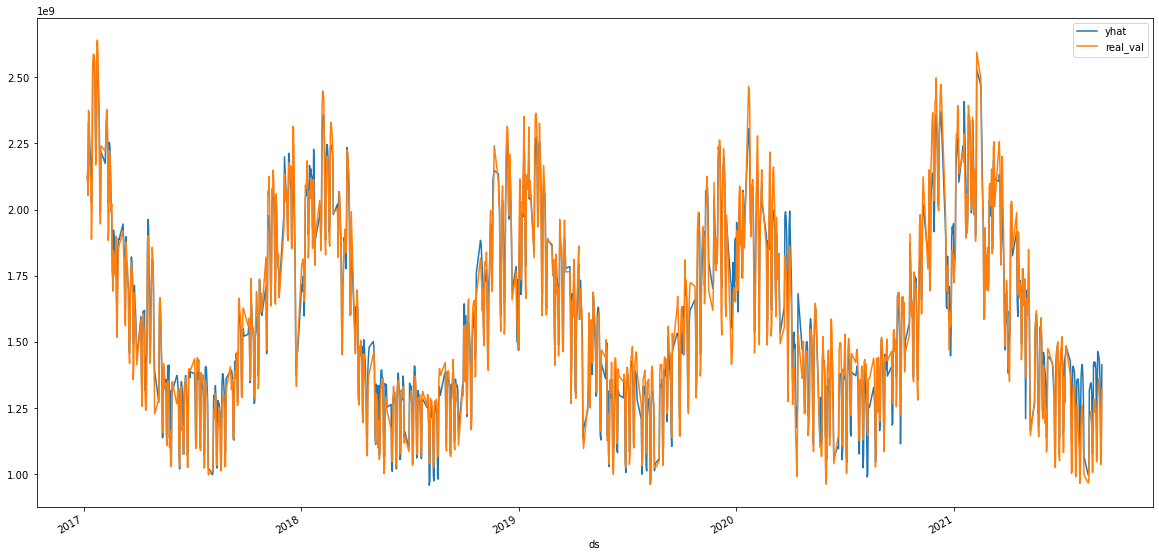

In [771]:
if make_imputation is True:
    rlm_complete=pd.concat([rlm_imputed,rlm_imputed2]).reset_index(drop=True).sort_values('ds')
    rlm_complete.index=rlm_complete['ds']
    rlm_complete.drop('ds',axis=1,inplace=True)

    rlm_complete2=rlm_complete.copy()
    rlm_complete2['real_val']=manager.df_gesamt[manager.df_gesamt.index<=rlm_complete.index[-1:][0]][target]
    rlm_complete2=rlm_complete2.dropna()

    print(metrics.METRICS_REGRESSION['mape'](rlm_complete2['real_val'],rlm_complete2['yhat']))
    rlm_complete2.plot(use_index=True,y=['yhat','real_val'])

# Write out imputation

In [772]:
#rlm_imputed.to_csv('./'+target+'_imputation.csv',sep=';')
#rlm_complete.to_csv('./'+target+'_imputation.csv',sep=';')

In [773]:
#rlm_imputed.head()